# Рубежный контроль №1 — Весна 2025

**Студент:** Абитов М.Р.  
**Группа:** ИУ5-63Б  
**Вариант:** №1  

---

### Задача №1

Для заданного набора данных проведите корреляционный анализ.  
В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски.  
Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

---


### Загрузка и подготовка данных

In [1]:
from sklearn.datasets import load_iris

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['target'] = iris.target

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [ ]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

### Корреляционная матрица

In [12]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


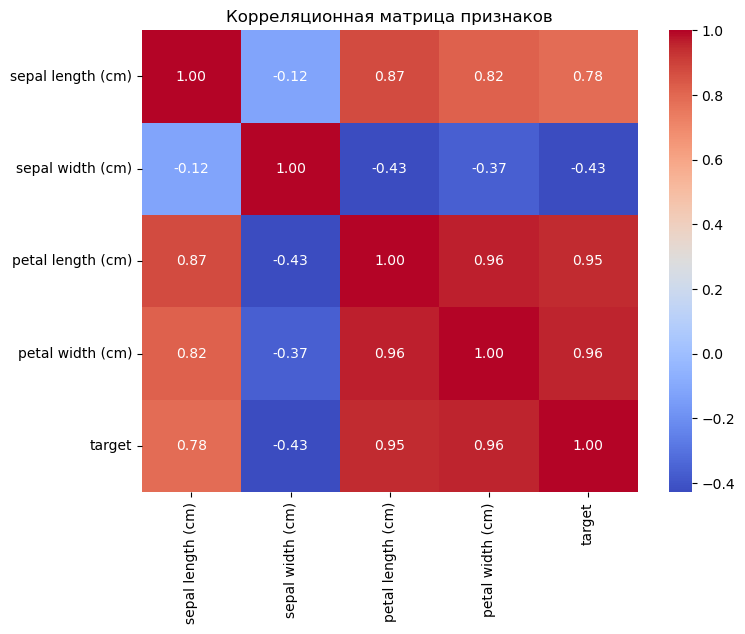

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица признаков')
plt.show()

У признаков petal length и petal width очень высокая связь между собой (коэффициент корреляции ~0.96), и они сильно связаны с целевым признаком target.

Признак sepal length также показывает умеренную положительную связь с target.

sepal width почти не связан с остальными признаками и слабо связан с target, возможно, он менее полезен для построения модели.

В целом, данные хорошо подходят для машинного обучения, особенно линейных моделей.

### "Ящик с усами"

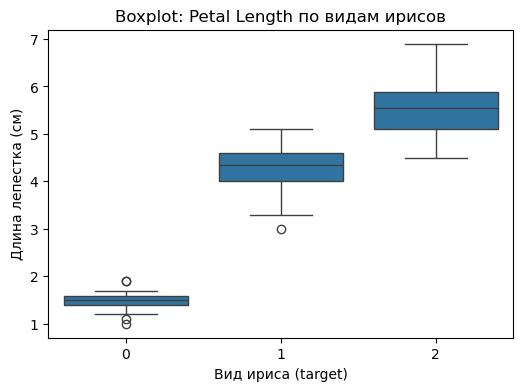

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='target', y='petal length (cm)', data=df)
plt.title('Boxplot: Petal Length по видам ирисов')
plt.xlabel('Вид ириса (target)')
plt.ylabel('Длина лепестка (см)')
plt.show()